In [1]:
# cubic regression using gradient descent

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('data/cubic.xlsx')
degree = 3

x_train = data['x'].values
y_train = data['y'].values

In [2]:
# create input matrix
X = np.ones((len(x_train), degree + 1))
for i in range(1, degree + 1):
    X[:, i] = x_train ** i

X.shape

(21, 4)

In [3]:
# scale the input matrix
X = X / np.max(X, axis=0)

In [4]:
# create vector of answers
y = y_train.reshape(-1, 1)

In [5]:
theta = np.zeros((X.shape[1], 1))
a = 1
m = len(x_train)

for _ in range(100000):
    # X @ theta are the predictions of y
    # (X @ theta - y) are the errors
    # X.T @ (X @ theta - y) sums the errors for each theta
    # (a / m) is learning rate (slow down the process)
    theta = theta - (a / m) * X.T @ (X @ theta - y)

theta.T

array([[  0.12385106,  15.44823171, -35.63461163,  22.45279513]])

In [6]:
# print equation
print('y = %.2f + %.2fx + %.2fx^2 + %.2fx^3' % (theta[0], theta[1], theta[2], theta[3]))

y = 0.12 + 15.45x + -35.63x^2 + 22.45x^3


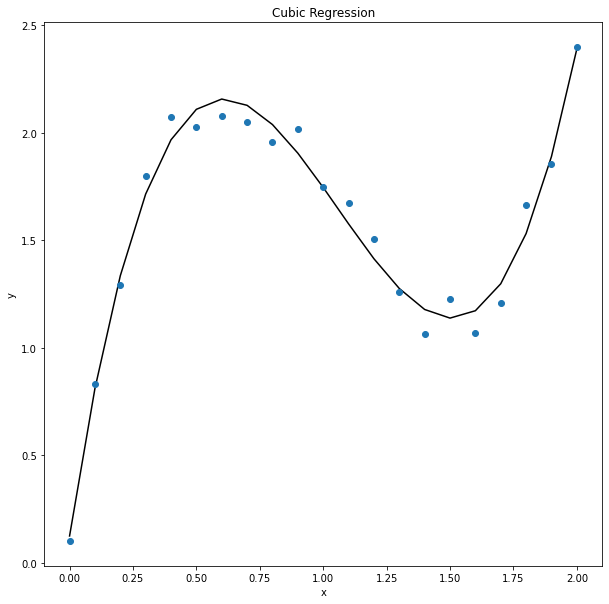

In [7]:
# plot results
plt.figure(figsize=(10, 10))
plt.title('Cubic Regression')
plt.xlabel('x')
plt.ylabel('y')

y_pred = X @ theta
plt.plot(x_train, y_pred, 'k-')
plt.plot(x_train, y_train, 'o')

plt.show()